# Explore ML

<p align=right>
<strong><I>
- Srajan Chourasia
</I></strong>
</p>

## Let's Build a CNN Model Fashin MNIST.

### First Import the Fashin MNIST DataSet.

In [23]:
# loading the Fashin MNIST dataset
from keras.datasets import fashion_mnist
from matplotlib import pyplot as plt

# load dataset 
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

# reshape dataset to have a single channel
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

# summarize loaded dataset
print(f'> Train Dataset: X (Image Shape) = {train_X.shape} and Y (Labels Shape) = {train_y.shape}')
print(f'> Test Dataset: X (Image Shape) = {test_X.shape} and Y (Labels Shape) = {test_y.shape}')

> Train Dataset: X (Image Shape) = (60000, 28, 28, 1) and Y (Labels Shape) = (60000,)
> Test Dataset: X (Image Shape) = (10000, 28, 28, 1) and Y (Labels Shape) = (10000,)


### Let's see some Images from the Dataset

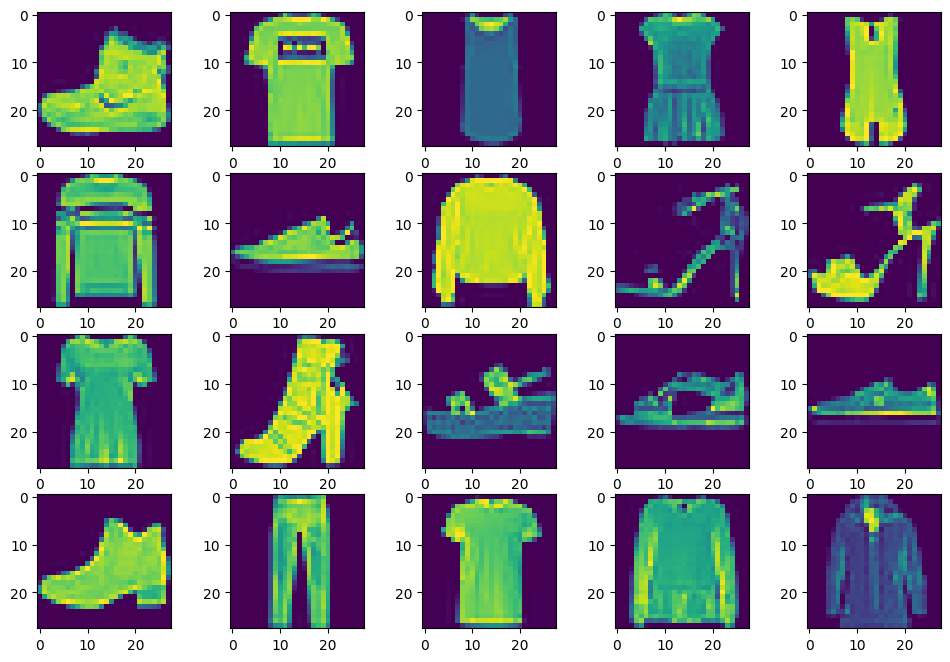

In [24]:
# plot first few images
plt.figure(figsize = (12, 8))
for i in range(20):
    # define subplot
    plt.subplot(4, 5, i+1)
    # plot raw pixel data
    plt.imshow(train_X[i])
    # if you want to see the data in gray scale then use the below command insted
    # plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

# show the figure
plt.show()

### Let's Normalising the Images
Bring down the Image Pixel Range from 0-255 to 0-1. 

In [25]:
# convert from integers to floats
train_norm_X = train_X.astype('float32')
test_norm_X = test_X.astype('float32')

# normalize to range 0-1
train_norm_X = train_norm_X / 255.0
test_norm_X = test_norm_X / 255.0

### One-Hot Encoding

In [26]:
# import the function to do one-hot encoding from keras
from keras.utils import to_categorical

# one-hot encoding of train and test labels
train_labels = to_categorical(train_y)
test_labels = to_categorical(test_y)

# shape of one-hot encoded labels
print(f'> Train Labels: Y (Labels Shape) = {train_labels.shape}')
print(f'> Test Labels: Y (Labels Shape) = {test_labels.shape}')

> Train Labels: Y (Labels Shape) = (60000, 10)
> Test Labels: Y (Labels Shape) = (10000, 10)


### Let's build the model architecture

In [27]:
# import all the necessary libraries
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import models
from keras.datasets import mnist

# Define the CNN model
model = models.Sequential()

# Input Layer
# First Convolution Layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', input_shape=(28, 28,1)))

# Max Pool Layer
model.add(MaxPooling2D((2, 2)))

# Second Convolution Layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))

# Max Pool Layer
model.add(MaxPooling2D((2, 2)))

# Flatten Layer
model.add(Flatten())

# Hidden Layers (Dense Layer)
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))

# Final Layer
# Output Layer
model.add(Dense(10, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 500)              

### To see the Model Archtecture Flow

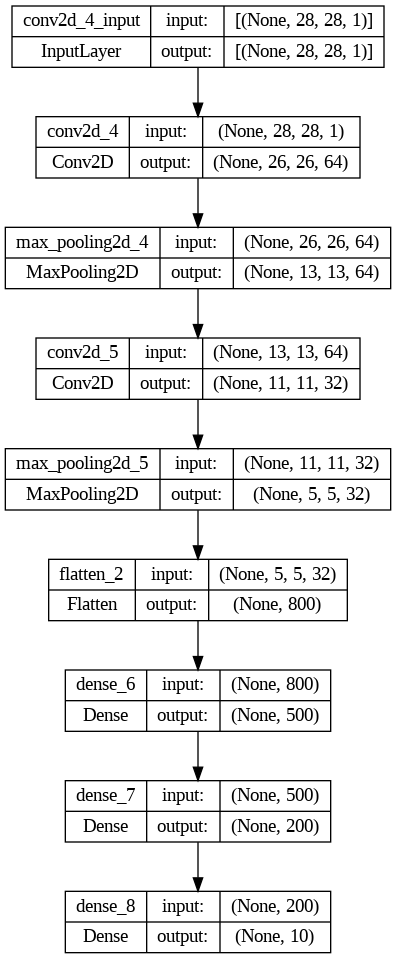

In [28]:
# import the function from keras
from keras.utils.vis_utils import plot_model

# Plot the model you just created
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


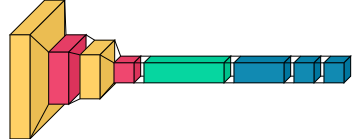

In [29]:
!pip install visualkeras

import visualkeras

visualkeras.layered_view(model)

### Let's Compile and Train the model now!

In [30]:
# Set the Optimizer
from tensorflow.keras.optimizers import Adam

# set the learning rate
adam = Adam(learning_rate = 1e-3)

# compile the model to use the training data to train the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = adam,
              metrics = ['accuracy'])

# Train the model on the training dataset
model.fit(train_norm_X, train_labels,
          batch_size = 200,
          epochs = 30,
          verbose = 1)

Epoch 1/30
300/300 [==============================] - 4s 7ms/step - loss: 0.5621 - accuracy: 0.7929
Epoch 2/30
300/300 [==============================] - 2s 7ms/step - loss: 0.3405 - accuracy: 0.8753
Epoch 3/30
300/300 [==============================] - 2s 6ms/step - loss: 0.2929 - accuracy: 0.8923
Epoch 4/30
300/300 [==============================] - 2s 6ms/step - loss: 0.2664 - accuracy: 0.9006
Epoch 5/30
300/300 [==============================] - 2s 8ms/step - loss: 0.2398 - accuracy: 0.9110
Epoch 6/30
300/300 [==============================] - 3s 9ms/step - loss: 0.2224 - accuracy: 0.9160
Epoch 7/30
300/300 [==============================] - 4s 13ms/step - loss: 0.2019 - accuracy: 0.9247
Epoch 8/30
300/300 [==============================] - 3s 10ms/step - loss: 0.1856 - accuracy: 0.9310
Epoch 9/30
300/300 [==============================] - 3s 9ms/step - loss: 0.1717 - accuracy: 0.9354
Epoch 10/30
300/300 [==============================] - 3s 8ms/step - loss: 0.1586 - accuracy: 0.94

### Let's Test Our model!

In [31]:
import numpy as np

# Test the model's accuracy with the test data
predictions = model.predict(test_norm_X)
predictions = np.argmax(predictions, axis = 1)

test_loss, test_acc = model.evaluate(test_norm_X, test_labels)

# print the test accuracy
print('> Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.5433 - accuracy: 0.9080
> Test accuracy: 0.9079999923706055


### Final Output

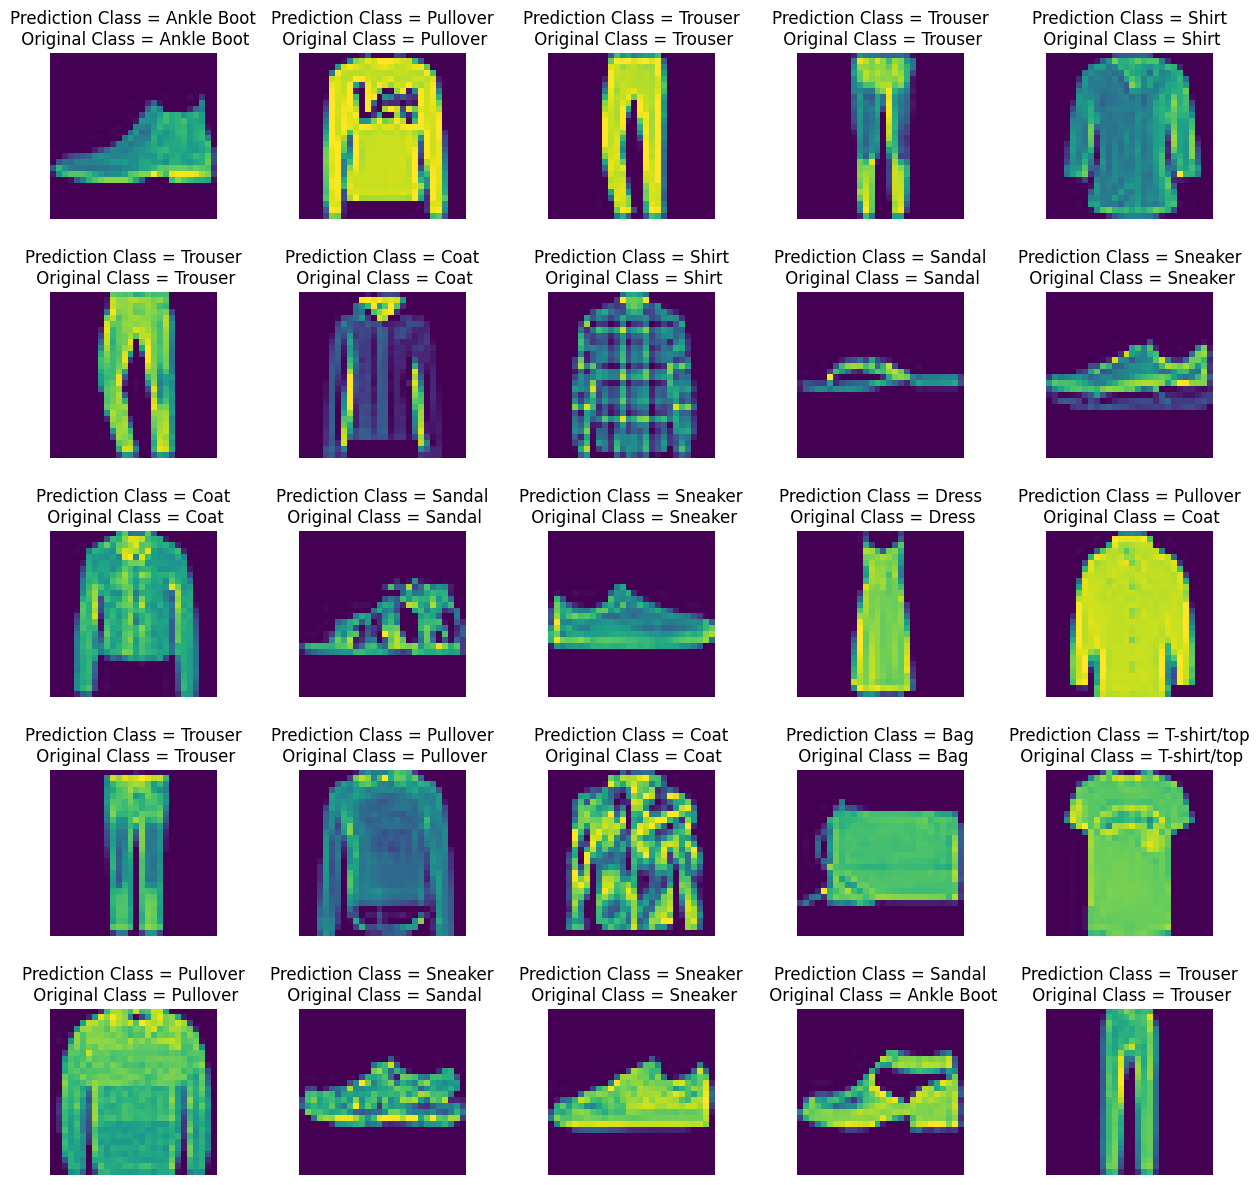

In [32]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(test_norm_X[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {labels[predictions[i]]}\n Original Class = {labels[test_y[i]]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

### Final Task: Save the model

In [33]:
# import the function from tensorflow keras
from tensorflow.keras.saving import save_model

# Save the Model
save_model(model, "my_fashin_mnist_model.h5")